# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


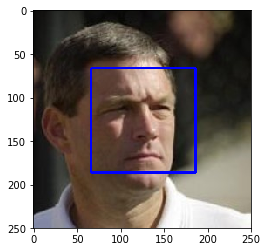

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
1. 99% of the first 100 images in `human_files` have a detected human face.
2. 15% of the first 100 images in `dog_files` have a detected human face.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

def object_detection_files(filenames, fn):    
    n = len(filenames)
    is_face = np.zeros(n)
    
    for i in range(n):
        is_face[i] = fn(filenames[i])
        
    return np.sum(is_face) / n

print("Percentage of samples detected as human faces: {:.4f}".format(object_detection_files(human_files_short, face_detector)))
print("Percentage of samples detected as human faces: {:.4f}".format(object_detection_files(dog_files_short, face_detector)))

Percentage of samples detected as human faces: 0.9900
Percentage of samples detected as human faces: 0.1500


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
from torchvision import datasets, models
import torchvision.transforms as transforms

def neuralnet_predict(img_path, fn):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    image = Image.open(img_path)    

    mean = (0.485, 0.456, 0.406)
    std = (0.229, 0.224, 0.225)    
    data_transform = transforms.Compose([transforms.Resize((224,224)),
                                         transforms.ToTensor(), 
                                         transforms.Normalize(mean, std)])
    image = data_transform(image).float()

    image = image.unsqueeze(0)
    fn.eval()
    output = fn(image.cuda())
    _, preds_tensor = torch.max(output, 1)
    
    return preds_tensor.data.cpu().numpy()[0] # predicted class index

def VGG16_predict(img_path):
    return neuralnet_predict(img_path, VGG16)

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, fn):    
    label = fn(img_path)    
    is_dog = (label >=151) and (label <=268)    
    return is_dog

def vgg_dog_detector(img_path):
    return dog_detector(img_path, VGG16_predict)

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
1. 0% of the first 100 images in `human_files` have a detected dog.
2. 100% of the first 100 images in `dog_files` have a detected dog.


In [8]:
print("Percentage of samples detected as dogs: {:.4f}".format(object_detection_files(human_files_short, vgg_dog_detector)))
print("Percentage of samples detected as dogs: {:.4f}".format(object_detection_files(dog_files_short, vgg_dog_detector)))

Percentage of samples detected as dogs: 0.0000
Percentage of samples detected as dogs: 1.0000


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [9]:
import os
from torchvision import datasets
from torch.utils.data.sampler import RandomSampler, SubsetRandomSampler
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_dir = './dogImages/train'
valid_dir ='./dogImages/valid'
test_dir ='./dogImages/test'

batch_size = 32
num_workers = 0

mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)    
data_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(10),                                     
                                     transforms.RandomResizedCrop(160, scale=(0.25,1.0)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean, std)])


train_data = datasets.ImageFolder(train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

n_train, n_valid, n_test = len(train_data), len(valid_data), len(test_data)
train_idx = list(range(n_train))
valid_idx = list(range(n_valid))
test_idx = list(range(n_test))

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                           sampler=test_sampler, num_workers=num_workers)

loaders_scratch = {'train':train_loader,
                   'valid':valid_loader,
                   'test' :test_loader}
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
The input data are augmented. The augmentation is achieved by several means:
1. The 25% to 100% of each image is cropped and resized to 160 by 160 pixels
2. The images can be rotated randomly for a range of -10 degrees to 10 degrees
3. The images can be flipped horizontally randomly

The input size of 160 by 160 is to lower the dimension of the image while allowing the construction of neural network architecture that is deeper and contain more neurons at each layer. The key constraint in the input size is the computational power and memory storage costs.



### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [10]:
import torch.nn as nn
import torch.nn.functional as F


def init_weights(m):
    
    if type(m) == nn.Linear:
        # apply a uniform distribution to the weights and a bias=0
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0)

        # define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.avg_pool = nn.AvgPool2d(2,2)
    
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)
        self.bn5 = nn.BatchNorm2d(512)
        
        self.fc1 = nn.Linear(512*5*5, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 133)        
        self.dropout = nn.Dropout(0.30)
        self.reset_parameters()
    
    def reset_parameters(self):
        init_weights(self.fc1)
        init_weights(self.fc2)
    
    def forward(self, x):
        ## Define forward behavior        
        x = self.pool(self.bn1(F.elu(self.conv1(x))))        
        x = self.pool(self.bn2(F.elu(self.conv2(x))))        
        x = self.pool(self.bn3(F.elu(self.conv3(x))))        
        x = self.pool(self.bn4(F.elu(self.conv4(x))))        
        x = self.avg_pool(self.bn5(F.elu(self.conv5(x))))        
        
        x = x.view(-1, 512*5*5)
        x = F.elu(self.fc1(x))
        x = self.dropout(x)
        x = F.elu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
There are a few pre-requisites in model construction:
1. The feature extraction layers (i.e. the convolutional layers) have increasing number of filters. The reason is that the shallower layers express low-level representations such as edge detections, hence it is unnecessary to have too many filters. However, at the deeper layer, we need to allow the model to express more variety of high-level representations. Hence the number of kernels in the deeper layer has to be higher.

2. The number of neurons in the classifier tends to be large in order to use the features extracted from the convolutional layers to classify the images into the right classes.

Other key features in model construction:
1. The convolutional layers are used as feature extractors. There are two major reasons that the convolutional layers are suitable as feature extractors, (1) sparse connections, (2) shared connections. The sparse connections allow for more efficient computation, but the shared connections actually force the architecture to learn meaningful representations at each localized areas.

2. Batch normalization layers are used to normalized the activation layers. If the model does not include batch normalization, there exists a phenomenon called covariate shift, which makes it difficult to train the neural network. Also, batch normalization is shown to have some regularization effects.

3. ELU activation units are used at each layer. The choice of ELU activation function is due to the fact that ELUs are shown to perform a tad better than the RELUs, while maintaining the main benefit of the RELUs - avoiding vanishing gradients. Also, ELUs are shown to have some regularization effects as well. 

4. Dropout layer are used for the classifier. The classifier is made up of multi-layered perceptrons, which has a larger number of neurons at each layer compared to the convolutional layers. This may result in overfitting. The dropout layer will deactivate some of those neurons randomly to achieve regularization.


Based on the above thoughts, we construct the different layers accordingly. However, the key missing piece is the number of filters and neurons in the respective feature extractors and classifier. 

1. The number of filters at each convolutional layers is $2^n$, where $n$ increases for deeper layers. Given that all the data contains are mainly dogs, it is likely that there are many features are shared across all the images and there would be no need for too many layers of convolutional layers. Experiments done have shown that 5 convolutional layers of 32, 64, 128, 256 and 512 filters respectively works pretty well.

2. The number of neurons at the classifier  is set to be large initially. However, we decrease the number of neurons after several experiments.

3. The initial few architectures are constructed with high number of neurons and filters. This is to ensure that the model is working well and actually overfits the training data (by actually overfitting the training data, we know that the rough model can actually classifying the dog breeds). Hence, we would have low training losses and high validation losses.

4. Once, the rough architecture works well for the training data, we start to reduce the number of filters and neurons. The reduction is done through several steps. A satisfactory model is achieved when the discrepancy between the validation and training losses are small.

The model achieves 47% accuracy after 100 epochs of training.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [11]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=2e-3)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [12]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
#         train_loss /= len(loaders['train'].dataset)    
#         valid_loss /= len(loaders['valid'].dataset)            
        
        # print training/validation statistics 
        print('Ep: {} \tTrain Loss: {:.5f} \tValid Loss: {:.5f}'
              .format(epoch, train_loss, valid_loss))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min and epoch >= 5:
            print('Valid loss ({:.6f} --> {:.6f}).  Saving model...\n'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [12]:
# train the model
n_epochs = 100
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Ep: 1 	Train Loss: 5.30072 	Valid Loss: 4.91176
Ep: 2 	Train Loss: 5.07905 	Valid Loss: 4.88485
Ep: 3 	Train Loss: 4.98922 	Valid Loss: 4.83190
Ep: 4 	Train Loss: 4.90223 	Valid Loss: 4.69471
Ep: 5 	Train Loss: 4.77075 	Valid Loss: 4.52129
Valid loss (inf --> 4.521294).  Saving model...

Ep: 6 	Train Loss: 4.68560 	Valid Loss: 4.60095
Ep: 7 	Train Loss: 4.59270 	Valid Loss: 4.59046
Ep: 8 	Train Loss: 4.46266 	Valid Loss: 4.50614
Valid loss (4.521294 --> 4.506143).  Saving model...

Ep: 9 	Train Loss: 4.36760 	Valid Loss: 4.30073
Valid loss (4.506143 --> 4.300734).  Saving model...

Ep: 10 	Train Loss: 4.21215 	Valid Loss: 4.14638
Valid loss (4.300734 --> 4.146380).  Saving model...

Ep: 11 	Train Loss: 4.10555 	Valid Loss: 3.94790
Valid loss (4.146380 --> 3.947899).  Saving model...

Ep: 12 	Train Loss: 4.00432 	Valid Loss: 3.98816
Ep: 13 	Train Loss: 3.87549 	Valid Loss: 3.77700
Valid loss (3.947899 --> 3.777005).  Saving model...

Ep: 14 	Train Loss: 3.77928 	Valid Loss: 3.84774
Ep: 

In [14]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [17]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.454071

Test Accuracy: 47% (395/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [18]:
import os
from torchvision import datasets
from torch.utils.data.sampler import RandomSampler, SubsetRandomSampler
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_dir = './dogImages/train'
valid_dir ='./dogImages/valid'
test_dir ='./dogImages/test'

batch_size = 32
num_workers = 0

mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)    
data_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(15),                                     
                                     transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean, std)])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

n_train, n_valid, n_test = len(train_data), len(valid_data), len(test_data)
train_idx = list(range(n_train))
valid_idx = list(range(n_valid))
test_idx = list(range(n_test))

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                           sampler=test_sampler, num_workers=num_workers)

loaders_transfer = {'train':train_loader,
                   'valid':valid_loader,
                   'test' :test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.densenet121(pretrained=True)

model_transfer.classifier
n_inputs = model_transfer.classifier.in_features
model_transfer.classifier = nn.Linear(n_inputs, 133)

init_weights(model_transfer.classifier)
# for layer in model_transfer.classifier:
#     if type(layer) == nn.Linear:        
#         init_weights(layer)

if use_cuda:
    model_transfer = model_transfer.cuda()

/home/thomas/vpy/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
For the transfer learning model, we froze all the weights of the feature extraction layers. The reason is that the model has been pretrained with Imagenet data. Hence the model has "seen" dog datasets across different breeds. However, since our model is trying to distinguish more subtleties of each image so that we can classifying more variety of dog breed, it is sufficient for us to merely train the classifier again.

I chose to implement the transfer learning on a DenseNet instead of VGG16. The core reason is that in this project, we have already used the VGG16 as the dog detector and ideally, would want to use a different architecture to refined the dog breed identification. 

Furthermore, it is impractical to retrain all the weights as the number of parameters in the Densenet is large while the dog data set we have is rather small. If we just use the pretrain weights as initializations and retrain all the model parameters, we will almost surely overfit the model to the training dataset.



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [21]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=2e-3)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# train the model
n_epochs = 50
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Ep: 1 	Train Loss: 2.81641 	Valid Loss: 1.47823
Ep: 2 	Train Loss: 1.34486 	Valid Loss: 1.21668
Ep: 3 	Train Loss: 1.10344 	Valid Loss: 1.19477
Ep: 4 	Train Loss: 0.97759 	Valid Loss: 0.98745
Ep: 5 	Train Loss: 0.92340 	Valid Loss: 1.03135
Valid loss (inf --> 1.031346).  Saving model...

Ep: 6 	Train Loss: 0.83216 	Valid Loss: 1.03933
Ep: 7 	Train Loss: 0.83436 	Valid Loss: 1.04251
Ep: 8 	Train Loss: 0.81903 	Valid Loss: 0.96458
Valid loss (1.031346 --> 0.964585).  Saving model...

Ep: 9 	Train Loss: 0.79661 	Valid Loss: 1.09327
Ep: 10 	Train Loss: 0.75155 	Valid Loss: 1.05762
Ep: 11 	Train Loss: 0.73754 	Valid Loss: 1.05764
Ep: 12 	Train Loss: 0.72857 	Valid Loss: 1.00882
Ep: 13 	Train Loss: 0.72092 	Valid Loss: 1.06292
Ep: 14 	Train Loss: 0.73646 	Valid Loss: 1.19387
Ep: 15 	Train Loss: 0.69290 	Valid Loss: 1.10426
Ep: 16 	Train Loss: 0.73170 	Valid Loss: 1.17257
Ep: 17 	Train Loss: 0.68418 	Valid Loss: 1.18590
Ep: 18 	Train Loss: 0.67328 	Valid Loss: 1.12105
Ep: 19 	Train Loss: 0.66

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [23]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.043045

Test Accuracy: 69% (583/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [27]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    model_transfer.eval()
    image = Image.open(img_path)    

    mean = (0.485, 0.456, 0.406)
    std = (0.229, 0.224, 0.225)    
    data_transform = transforms.Compose([transforms.Resize((224,224)),
                                         transforms.ToTensor(), 
                                         transforms.Normalize(mean, std)])
    image = data_transform(image).float()
    image = image.unsqueeze(0)    
    output = model_transfer(image.cuda())
    _, preds_tensor = torch.max(output, 1)
    idx = preds_tensor.data.cpu().numpy()[0]
    
    return class_names[idx] # predicted class index


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [25]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither

    try:
        # If a dog face is detected, predict it's breed
        if vgg_dog_detector(img_path):
            breed = predict_breed_transfer(img_path)
            msg = "Hello Dog, Your predicted breed is {}".format(breed)
        # If a human face is detected, predict the dog breed resembling the face
        elif face_detector(img_path):
            breed = predict_breed_transfer(img_path)
            msg = "Hello Human, You look like a {}".format(breed)
        # If neither is detected, set the return message to None
        else:
            msg = None
    except Exception as ex:
        print(ex)
        msg = None
    finally:
        # Return the appropriately constructed message
        return msg

def output(img_path):
    # Obtain the message
    message = run_app(img_path)
    
    # If the message is None, diplay error
    if message is None:
        message = "Error in detecting the image"
    
    # If the message is not None, display the message along with the source image
    # Read the image
    img = cv2.imread(img_path)
    # Convert it to RGB for displaying properly
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image and print the message
    plt.imshow(img_rgb)
    plt.show()        
    print(message)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
The output is better than expected. On the instances where the images contain a human, the human face detector works fairly well across all the test images. 

Also, the instances where there were neither dogs nor humans, the app can actually detect that this is the case. The only exception is that when we pass a cartoon of a dog, we managed to fool the dog detector network.

Of all the images of dogs, the app manages the following:
1. Correction classification of the Bernese mountain dog. This is rather easy as the breed has very distinctive fur coat and colors.

2. Wrong classification of the german shepherd puppy. The network classified the puppy Belgian tervuren. This is a rather difficult task as the facial feature and color of the adult Belgian tervuren dog is similar to that of a German shepherd puppy. The German shepherd puppy will have change in the color of their fur as they grow.

3. Correction classification of the Chow Chow. Again, this breed has a very distinctive look and it is hard to be mistaken for other breeds.

4. Surprisingly, the network actually recognises Max from the Secret Life of Pets as a Chihuahua, as the character looks like a tiny dog and differs from the actual Jack Russell terrier breed.

5. The pitbull was classified as American Staffordshire terrier. Again, the two breeds are hard to be distinguished. Both breeds have pointed ears, huge head and muscular look. 

6. Correction classification of the Alaskan malamute. The network does a pretty good job here as it can be rather easy to mix up the Alaskan malamute and the Siberian husky.


All in, the network is able to distinguish dogs with very distinctive looks. However, breeds that share the same features may be classified wrongly. Also, pups vs adult dogs may look different and the network fails to distinguish that too.


#### Points of improvement:
1. Ensembling methods: It is computationally cheap to do transfer learning of several large models as the parameters of the feature extractors are frozen and only the parameters of the classifier is retrained. We can actually train several models and combined the predictions from all the models (via voting or averaging mechanism). It is shown that an ensemble of models tend to work better than just a single model.

2. Increasing size of datasets: There are only 8351 dog images and only 6680 of those are the actual training data set. Given that there are 133 classes, we effectively have 50 images for each class (6680 / 133) during the training process. The training data set is relatively small and we can likely improve the performance of the model by using a larger data set.

3. Class imbalances: Some of the classes have more training data than others. The class imbalances will influence the model to predict classes with larger number of training data. It is important to either make sure that the amount of training data for each classes are approximately the same, or, we can impose sample weights on the classes to correct for class imbalances.

4. Retraining the feature extractors: If it is possible to procure more training as discussed in 2, we can actually use the pretrained model parameters as initialization and retrain the whole model from end to end. In this case, all the model parameters will be relearned specifically for the dog breed identification task.

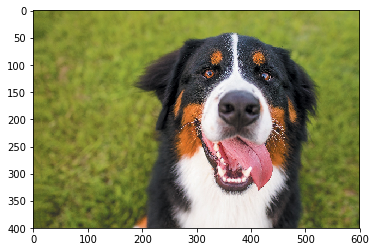

Hello Dog, Your predicted breed is Bernese mountain dog


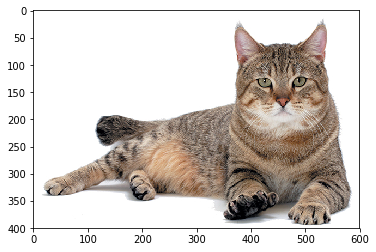

Error in detecting the image


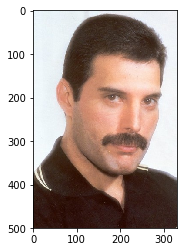

Hello Human, You look like a Xoloitzcuintli


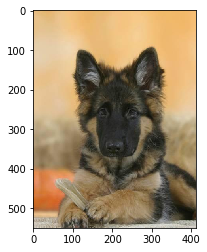

Hello Dog, Your predicted breed is Belgian tervuren


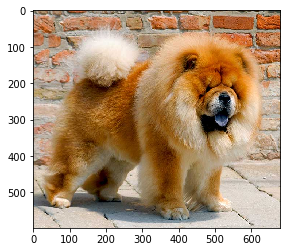

Hello Dog, Your predicted breed is Chow chow


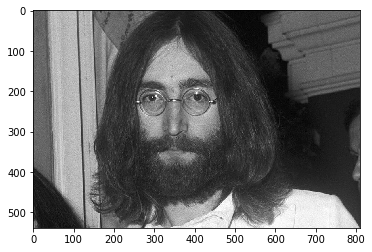

Hello Human, You look like a Chinese crested


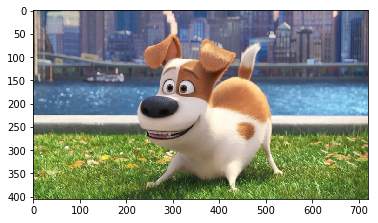

Hello Dog, Your predicted breed is Chihuahua


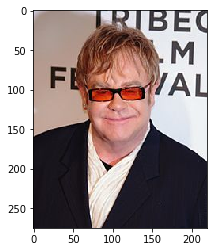

Hello Human, You look like a Chinese crested


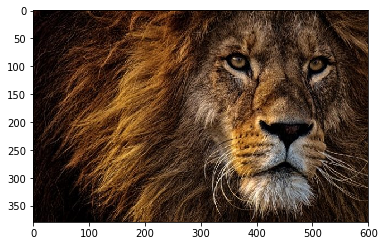

Error in detecting the image


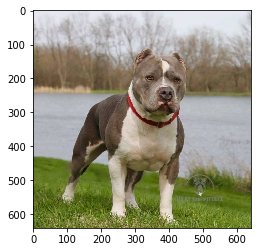

Hello Dog, Your predicted breed is American staffordshire terrier


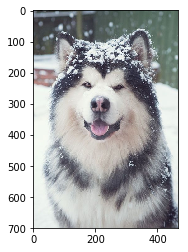

Hello Dog, Your predicted breed is Alaskan malamute


In [26]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
test_images = np.array(glob("test_images/*"))

for file in test_images:
    output(file)